# EDA on Titanic

## Imported Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the dataset

In [8]:
# Assuming the dataset is in CSV format
df = pd.read_csv('./titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Initial data exploration

In [9]:
# Display the first few rows of the dataset
print(df.head())

# Get summary statistics of numerical columns
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# Check the number of missing values in each column
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

## Data Cleaning and Preprocessing

In [19]:
# Handle Missing Values
df = df.dropna()  # Remove rows with missing values
# or
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Fill missing values with mean

# Handle Categorical Variables
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})  # Map categorical values to numerical

# Feature Engineering 
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Create a new feature by combining existing ones


## Data Visualization

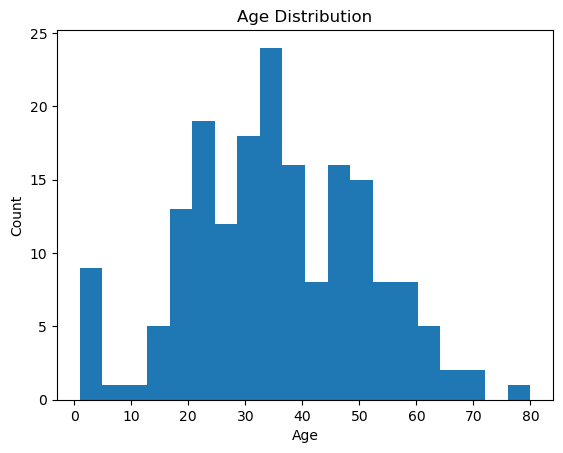

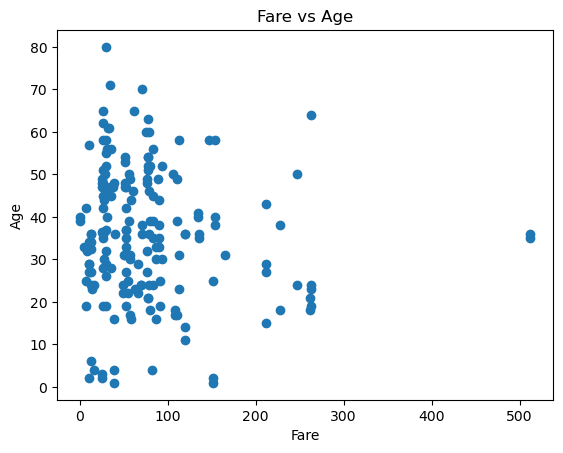

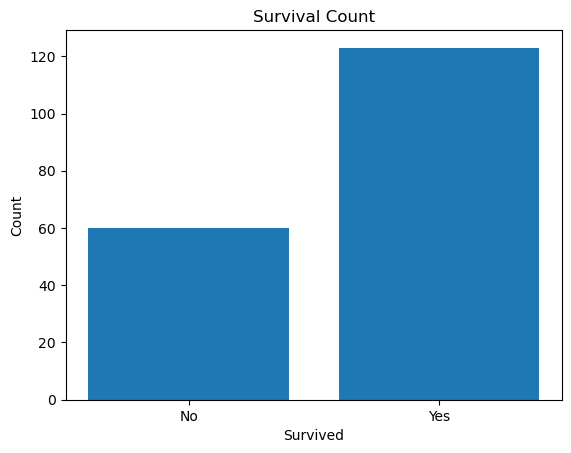

In [11]:
# Histogram
plt.hist(df['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Scatter Plot
plt.scatter(df['Fare'], df['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs Age')
plt.show()

# Bar Plot
plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts().values)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


## Correlation analysis

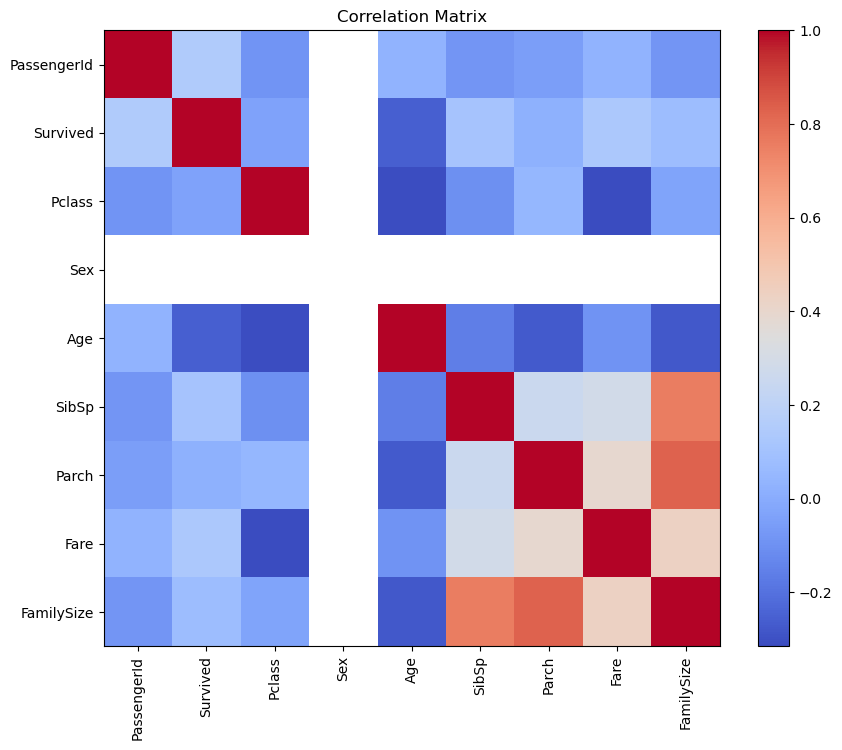

In [20]:
# Compute correlation matrix for only numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()


## Performing Calculations

In [18]:

# Calculate the mean age and fare
mean_age = np.mean(df['Age'])
mean_fare = np.mean(df['Fare'])

# Calculate the median age and fare
median_age = np.median(df['Age'])
median_fare = np.median(df['Fare'])

# Calculate the standard deviation of age and fare
std_age = np.std(df['Age'])
std_fare = np.std(df['Fare'])

print(f"Mean Age: {mean_age}, Median Age: {median_age}, Standard Deviation Age: {std_age}")
print(f"Mean Fare: {mean_fare}, Median Fare: {median_fare}, Standard Deviation Fare: {std_fare}")


Mean Age: 35.6744262295082, Median Age: 36.0, Standard Deviation Age: 15.601064611766539
Mean Fare: 78.68246885245901, Median Fare: 57.0, Standard Deviation Fare: 76.13895628242061
